In [105]:
import os
import json
import pandas as pd

base_path = "links"  # ajusta si la ruta es distinta
rows = []

# Recorremos cada carpeta (papa)
for pope in os.listdir(base_path):
    pope_path = os.path.join(base_path, pope)
    if os.path.isdir(pope_path):
        # Recorremos cada archivo json (idioma)
        for file in os.listdir(pope_path):
            if file.endswith(".json"):
                lang = file.replace(".json", "")
                file_path = os.path.join(pope_path, file)
                
                with open(file_path, "r", encoding="utf-8") as f:
                    links = json.load(f)
                    for link in links:
                        rows.append({"pope": pope, "lang": lang, "link": link})

# Crear DataFrame
df = pd.DataFrame(rows)

# Mostrar resultados
print("\nTotal de links:", len(df))
print("\nLinks por papa:")
print(df.groupby("pope")["link"].count())
print("\nLinks por idioma:")
print(df.groupby("lang")["link"].count())

df["link"].apply(
    lambda x: x.split("/")[7] if x.split("/")[8] == "documents" else x.split("/")[8]
)

import pandas as pd
import re

# -------------------------
# Función para extraer fecha
# -------------------------
def extract_date_from_title(title: str):
    match = re.search(r"(\d{8})", title)
    if not match:
        return None
    digits = match.group(1)
    
    if digits[:4].startswith(("19", "20")):
        dt = pd.to_datetime(digits, format="%Y%m%d", errors="coerce")
    elif digits[-4:].startswith(("19", "20")):
        dt = pd.to_datetime(digits, format="%d%m%Y", errors="coerce")
    else:
        return None
    
    return dt.strftime("%Y-%m-%d") if pd.notna(dt) else None

# -------------------------
# Procesamiento
# -------------------------

# Dividir en segmentos
df["parts"] = df["link"].str.split("/")

# Title = el segmento más largo de la URL
df["title"] = df["parts"].apply(lambda parts: max(parts, key=len))

# Type = aquí lo dejamos fijo al segmento [6] (puedes ajustar)
df["type"] = df["parts"].apply(lambda parts: parts[6] if len(parts) > 6 else None)

# Date = extraída del título
df["date"] = df["title"].apply(extract_date_from_title)

df = df.drop(columns=["parts"])

# -------------------------
# Resultado final
# -------------------------
df.head()




Total de links: 72734

Links por papa:
pope
benedict-xv       236
benedict-xvi     9475
francesco       17369
john-paul-i        75
john-paul-ii    34545
john-xxiii       1283
leo-xiii          461
leo-xiv           522
paul-vi          6705
pius-x            375
pius-xi           268
pius-xii         1420
Name: link, dtype: int64

Links por idioma:
lang
en    17568
es    19991
it    30018
la     5157
Name: link, dtype: int64


,pope,lang,link,title,type,date
0,pius-x,la,https://www.vatican.va/content/pius-x/la/apost...,hf_p-x_apc_19060118_provida-sapientique-cura.html,apost_constitutions,1906-01-18
1,pius-x,la,https://www.vatican.va/content/pius-x/la/apost...,hf_p-x_apc_19080629_lex-propria.html,apost_constitutions,1908-06-29
2,pius-x,la,https://www.vatican.va/content/pius-x/la/apost...,hf_p-x_apc_19080629_ordo-servandus-normae-1.html,apost_constitutions,1908-06-29
3,pius-x,la,https://www.vatican.va/content/pius-x/la/apost...,hf_p-x_apc_19080629_ordo-servandus-normae-2.html,apost_constitutions,1908-06-29
4,pius-x,la,https://www.vatican.va/content/pius-x/la/apost...,hf_p-x_apc_19080629_sapienti-consilio-index.html,apost_constitutions,1908-06-29


In [110]:
df["link"].apply(
    lambda x: x.split("/")[7] if x.split("/")[8] == "documents" else x.split("/")[8]
)

import pandas as pd
import re

# -------------------------
# Función para extraer fecha
# -------------------------
def extract_date_from_title(title: str):
    match = re.search(r"(\d{8})", title)
    if not match:
        return None
    digits = match.group(1)
    
    if digits[:4].startswith(("19", "20")):
        dt = pd.to_datetime(digits, format="%Y%m%d", errors="coerce")
    elif digits[-4:].startswith(("19", "20")):
        dt = pd.to_datetime(digits, format="%d%m%Y", errors="coerce")
    else:
        return None
    
    return dt.strftime("%Y-%m-%d") if pd.notna(dt) else None

# -------------------------
# Procesamiento
# -------------------------

# Dividir en segmentos
df["parts"] = df["link"].str.split("/")

# Title = el segmento más largo de la URL
df["title"] = df["parts"].apply(lambda parts: max(parts, key=len))

# Type = aquí lo dejamos fijo al segmento [6] (puedes ajustar)
df["type"] = df["parts"].apply(lambda parts: parts[6] if len(parts) > 6 else None)

# Date = extraída del título
df["date"] = df["title"].apply(extract_date_from_title)

# -------------------------
# Resultado final
# -------------------------
df.head()



df_pivot = df.pivot_table(
    index=["pope", "type", "title", "date"],
    columns="lang",
    values="link",
    aggfunc="first"
).reset_index()

df_pivot['missing_es'] = df_pivot['es'].isna()
df_pivot

lang,pope,type,title,date,en,es,it,la,missing_es
0,benedict-xv,apost-constitutions,hf_ben-xv_apc_19150810_incruentum-altaris.html,1915-08-10,NaN,NaN,NaN,https://www.vatican.va/content/benedict-xv/la/...,True
1,benedict-xv,apost-constitutions,hf_ben-xv_apc_19190514_bracarensis.html,1919-05-14,NaN,NaN,NaN,https://www.vatican.va/content/benedict-xv/la/...,True
2,benedict-xv,apost-constitutions,hf_ben-xv_apc_19200220_treiensis.html,1920-02-20,NaN,NaN,NaN,https://www.vatican.va/content/benedict-xv/la/...,True
3,benedict-xv,apost-constitutions,hf_ben-xv_apc_19200522_catamarcensis.html,1920-05-22,NaN,NaN,NaN,https://www.vatican.va/content/benedict-xv/la/...,True
4,benedict-xv,apost-constitutions,hf_ben-xv_apc_19210930_ad-christifidelium-bonu...,1921-09-30,NaN,NaN,NaN,https://www.vatican.va/content/benedict-xv/la/...,True
...,...,...,...,...,...,...,...,...,...
37755,pius-xii,speeches,hf_p-xii_spe_19581002_librerie-stazione.html,1958-10-02,NaN,NaN,https://www.vatican.va/content/pius-xii/it/spe...,NaN,True
37756,pius-xii,speeches,hf_p-xii_spe_19581003_fedeli-usa.html,1958-10-03,https://www.vatican.va/content/pius-xii/en/spe...,NaN,NaN,NaN,True
37757,pius-xii,speeches,hf_p-xii_spe_19581004_chirurgia-plastica.html,1958-10-04,NaN,NaN,https://www.vatican.va/content/pius-xii/it/spe...,NaN,True
37758,pius-xii,speeches,hf_p-xii_spe_19581019_seminario-puglie.html,1958-10-19,NaN,NaN,https://www.vatican.va/content/pius-xii/it/spe...,NaN,True


In [84]:
import pandas as pd
import re

# -------------------------
# Función para extraer fecha
# -------------------------
def extract_date_from_title(title: str):
    match = re.search(r"(\d{8})", title)
    if not match:
        return None
    digits = match.group(1)
    
    if digits[:4].startswith(("19", "20")):
        dt = pd.to_datetime(digits, format="%Y%m%d", errors="coerce")
    elif digits[-4:].startswith(("19", "20")):
        dt = pd.to_datetime(digits, format="%d%m%Y", errors="coerce")
    else:
        return None
    
    return dt.strftime("%Y-%m-%d") if pd.notna(dt) else None

# -------------------------
# Procesamiento
# -------------------------

# Dividir en segmentos
df["parts"] = df["link"].str.split("/")

# Title = el segmento más largo de la URL
df["title"] = df["parts"].apply(lambda parts: max(parts, key=len))

# Type = aquí lo dejamos fijo al segmento [6] (puedes ajustar)
df["type"] = df["parts"].apply(lambda parts: parts[6] if len(parts) > 6 else None)

# Date = extraída del título
df["date"] = df["title"].apply(extract_date_from_title)

# -------------------------
# Resultado final
# -------------------------
df.head()


,pope,lang,link,type,title,date,parts
0,pius-x,la,https://www.vatican.va/content/pius-x/la/apost...,apost_constitutions,hf_p-x_apc_19060118_provida-sapientique-cura.html,1906-01-18,"[https:, , www.vatican.va, content, pius-x, la..."
1,pius-x,la,https://www.vatican.va/content/pius-x/la/apost...,apost_constitutions,hf_p-x_apc_19080629_lex-propria.html,1908-06-29,"[https:, , www.vatican.va, content, pius-x, la..."
2,pius-x,la,https://www.vatican.va/content/pius-x/la/apost...,apost_constitutions,hf_p-x_apc_19080629_ordo-servandus-normae-1.html,1908-06-29,"[https:, , www.vatican.va, content, pius-x, la..."
3,pius-x,la,https://www.vatican.va/content/pius-x/la/apost...,apost_constitutions,hf_p-x_apc_19080629_ordo-servandus-normae-2.html,1908-06-29,"[https:, , www.vatican.va, content, pius-x, la..."
4,pius-x,la,https://www.vatican.va/content/pius-x/la/apost...,apost_constitutions,hf_p-x_apc_19080629_sapienti-consilio-index.html,1908-06-29,"[https:, , www.vatican.va, content, pius-x, la..."


In [91]:
df_pivot = df_pivot.sample(5)
df_pivot

lang,pope,type,title,date,en,es,it,la,missing_es
22986,john-paul-ii,speeches,hf_jp-ii_spe_19860929_restauro-statua.html,1986-09-29,NaN,NaN,https://www.vatican.va/content/john-paul-ii/it...,NaN,True
37425,pius-xii,speeches,hf_p-xii_spe_19530112_concistoro-segreto.html,1953-01-12,NaN,NaN,NaN,https://www.vatican.va/content/pius-xii/la/spe...,True
25478,john-paul-ii,speeches,hf_jp-ii_spe_19920609_benguela-catechisti.html,1992-06-09,NaN,NaN,https://www.vatican.va/content/john-paul-ii/it...,NaN,True
13797,john-paul-ii,apost_letters,hf_jp-ii_apl_19921229_hispali-in-antiqua.html,1992-12-29,NaN,NaN,NaN,https://www.vatican.va/content/john-paul-ii/la...,True
6550,francesco,cotidie,papa-francesco-cotidie_20200513_come-itralci-e...,2020-05-13,https://www.vatican.va/content/francesco/en/co...,https://www.vatican.va/content/francesco/es/co...,https://www.vatican.va/content/francesco/it/co...,NaN,False


In [95]:
df_pivot

lang,pope,type,title,date,en,es,it,la,missing_es
22986,john-paul-ii,speeches,hf_jp-ii_spe_19860929_restauro-statua.html,1986-09-29,NaN,NaN,https://www.vatican.va/content/john-paul-ii/it...,NaN,True
37425,pius-xii,speeches,hf_p-xii_spe_19530112_concistoro-segreto.html,1953-01-12,NaN,NaN,NaN,https://www.vatican.va/content/pius-xii/la/spe...,True
25478,john-paul-ii,speeches,hf_jp-ii_spe_19920609_benguela-catechisti.html,1992-06-09,NaN,NaN,https://www.vatican.va/content/john-paul-ii/it...,NaN,True
13797,john-paul-ii,apost_letters,hf_jp-ii_apl_19921229_hispali-in-antiqua.html,1992-12-29,NaN,NaN,NaN,https://www.vatican.va/content/john-paul-ii/la...,True
6550,francesco,cotidie,papa-francesco-cotidie_20200513_come-itralci-e...,2020-05-13,https://www.vatican.va/content/francesco/en/co...,https://www.vatican.va/content/francesco/es/co...,https://www.vatican.va/content/francesco/it/co...,NaN,False


In [ ]:
import os
import requests
from markdownify import markdownify as md
import pandas as pd

# Carpeta base
OUTPUT_DIR = "vatican_html"

# -------------------------
# Función para descargar y convertir HTML a Markdown
# -------------------------
def download_html(url, pope, lang, title, output_dir=OUTPUT_DIR):
    try:
        resp = requests.get(url)
        resp.raise_for_status()
        # Forzar codificación UTF-8
        resp.encoding = 'utf-8'
        html = resp.text
        
        # Crear carpeta pope/lang si no existe
        folder = os.path.join(output_dir, pope, lang)
        os.makedirs(folder, exist_ok=True)
        
        # Guardar archivo con mismo title
        filepath = os.path.join(folder, title)
        with open(filepath, "w", encoding="utf-8") as f:
            f.write(html)
        
        print(f"Guardado HTML: {filepath}")
    except Exception as e:
        print(f"Error descargando {url}: {e}")

# -------------------------
# Recorrer DataFrame
# -------------------------
for _, row in df_pivot.iterrows():
    # Elegir idioma: español si existe, sino primero disponible
    if pd.notna(row["es"]):
        url = row["es"]
        lang = "es"
    elif pd.notna(row["en"]):
        url = row["en"]
        lang = "en"
    elif pd.notna(row["it"]):
        url = row["it"]
        lang = "it"
    elif pd.notna(row["la"]):
        url = row["la"]
        lang = "la"
    else:
        print(f"No hay URL disponible para {row['title']}")
        continue
    
    download_html(url, row["pope"], lang, row["title"])


Guardado HTML: vatican_html/john-paul-ii/it/hf_jp-ii_spe_19860929_restauro-statua.html
Guardado HTML: vatican_html/pius-xii/la/hf_p-xii_spe_19530112_concistoro-segreto.html
Guardado HTML: vatican_html/john-paul-ii/it/hf_jp-ii_spe_19920609_benguela-catechisti.html
Guardado HTML: vatican_html/john-paul-ii/la/hf_jp-ii_apl_19921229_hispali-in-antiqua.html
Guardado HTML: vatican_html/francesco/es/papa-francesco-cotidie_20200513_come-itralci-e-lavite.html


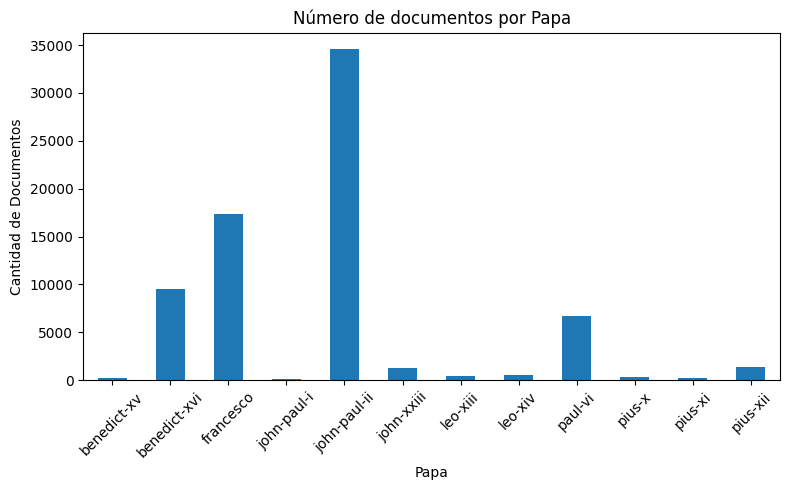

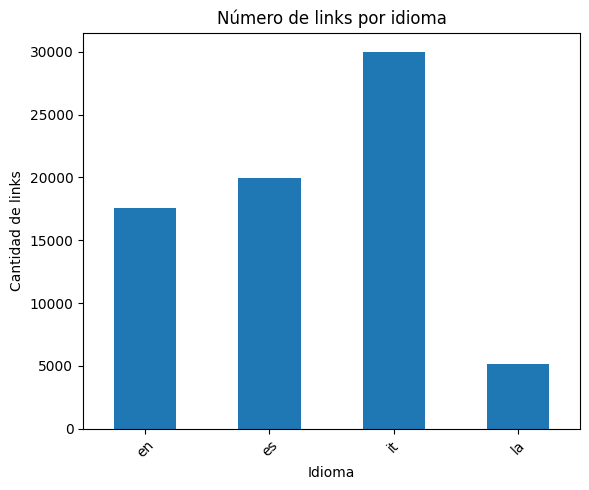

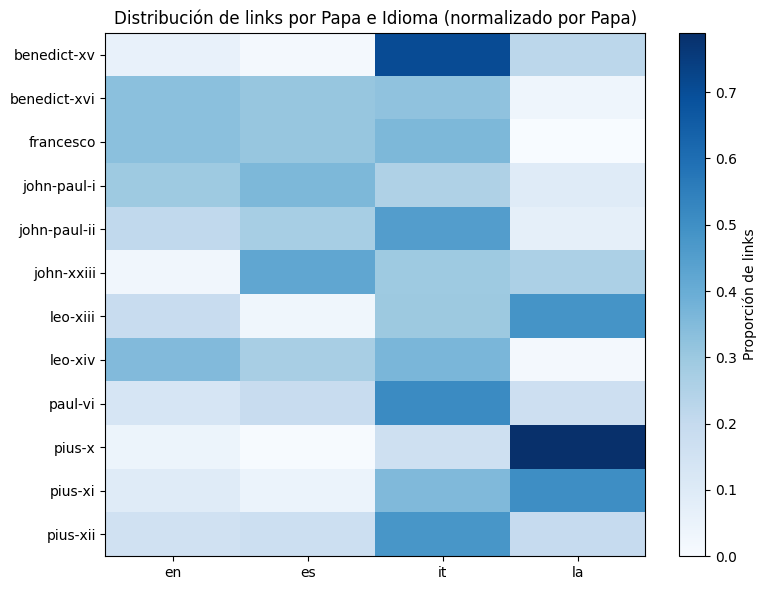

In [17]:
import matplotlib.pyplot as plt

# --- Links por Papa ---
counts_pope = df.groupby("pope")["link"].count()

plt.figure(figsize=(8,5))
counts_pope.plot(kind="bar")
plt.title("Número de documentos por Papa")
plt.xlabel("Papa")
plt.ylabel("Cantidad de Documentos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- Links por Idioma ---
counts_lang = df.groupby("lang")["link"].count()

plt.figure(figsize=(6,5))
counts_lang.plot(kind="bar")
plt.title("Número de links por idioma")
plt.xlabel("Idioma")
plt.ylabel("Cantidad de links")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- Links por Papa e Idioma (heatmap sencillo) ---
# Crear tabla Papa x Idioma
pivot = df.pivot_table(index="pope", columns="lang", values="link", aggfunc="count", fill_value=0)

# Normalizar por filas (cada Papa)
pivot_normalized = pivot.div(pivot.sum(axis=1), axis=0)

plt.figure(figsize=(8,6))
plt.imshow(pivot_normalized, cmap="Blues", aspect="auto")
plt.colorbar(label="Proporción de links")
plt.xticks(range(len(pivot_normalized.columns)), pivot_normalized.columns)
plt.yticks(range(len(pivot_normalized.index)), pivot_normalized.index)
plt.title("Distribución de links por Papa e Idioma (normalizado por Papa)")
plt.tight_layout()
plt.show()
